# Regression Plots
regression itu seperti mencari trend hubungan antara banyak data, apakah ada garis yang memperlihatkan trend datanya seperti apa. kalau datanya 2 dimensi, kita seperti membuat scatter plot, lalu kita cari dari titik2 datanya, garis lurus mana yang paling "best fit" di antara data tersebut

di contoh kali ini, kita akan gunakan data imigrasi Canada untuk membuat regression plot antara tahun dengan jumlah imigran

In [10]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# import data
df_can = pd.read_excel('../dataset/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

df_can = df_can.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])
df_can = df_can.rename(columns={
                       'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region', 'DevName': 'Dev'})
df_can = df_can.set_index('Country')

df_can.head()

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [8]:
years = range(1980,2014)
df_total = df_can[years].sum().reset_index()

df_total.columns = ["Year", "Total"]

df_total.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<AxesSubplot:xlabel='Year', ylabel='Total'>

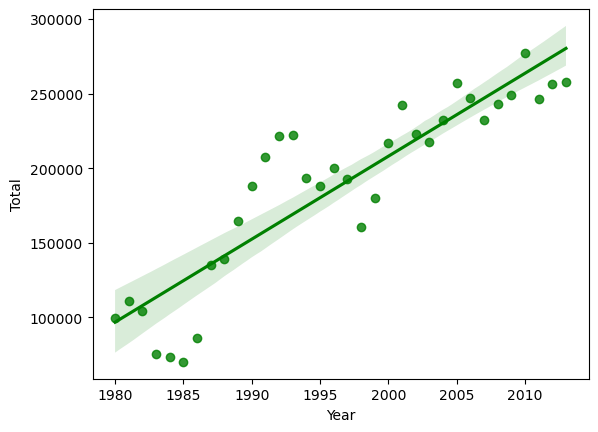

In [9]:
# membuat regression plot

sns.regplot(x="Year", y="Total", data=df_total, color="green")

kalau dibuat jadi formula, garis itu adalah `y = ax + c` dimana a dan cadalah sebuah angka konstan, x adalah angka Year, dan y adalah angka Total yang bisa dihitung jika kita tahu Year nya

Text(0.5, 1.0, 'Hubungan Year dengan Total immigran yang masuk Canada selama 1980-2013')

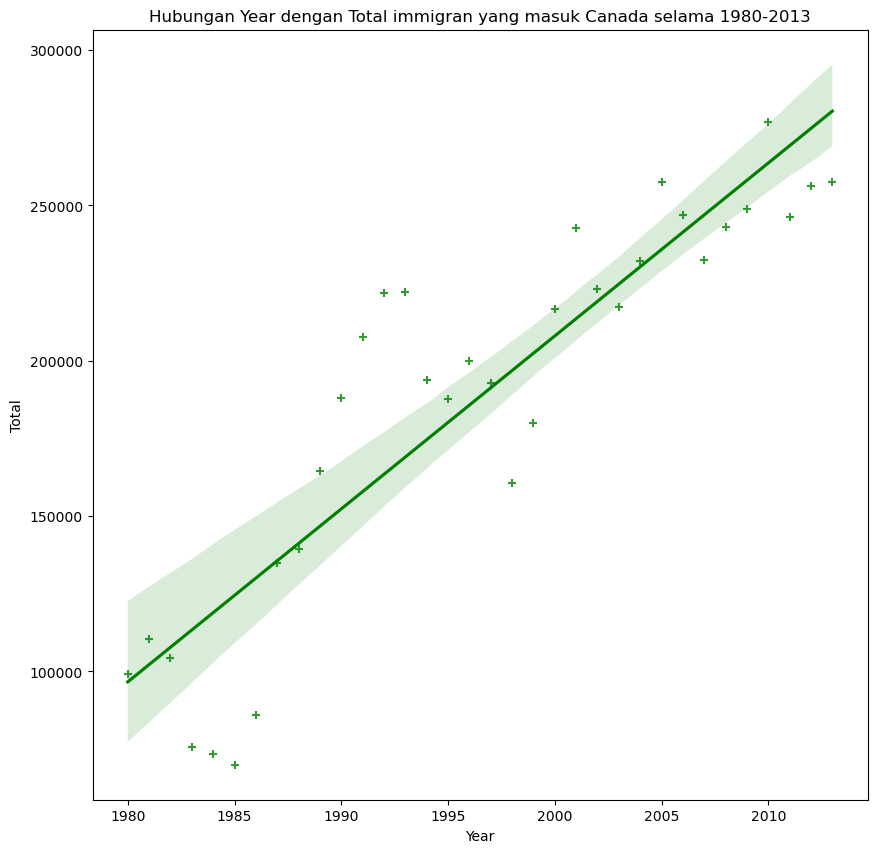

In [13]:
plt.figure(figsize=(10,10))
sns.regplot(x="Year", y="Total", data=df_total, color="green", marker="+")
plt.title("Hubungan Year dengan Total immigran yang masuk Canada selama 1980-2013")

In [26]:
list_years = []

for x in years:
    list_years.append(x)

list_years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [33]:
# coba bikin regression plot untuk setiap benua
df_continent = df_can.groupby("Continent")[list_years].sum()
df_continent = df_continent.T.reset_index()
df_continent = df_continent.rename(columns={"index":"Year"})
df_continent.head()

Continent,Year,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
0,1980,3951,31025,39760,13081,9378,1942
1,1981,4363,34314,44802,15215,10030,1839
2,1982,3819,30214,42720,16769,9074,1675
3,1983,2671,24696,24638,15427,7100,1018
4,1984,2639,27274,22287,13678,6661,878


<AxesSubplot:xlabel='Year', ylabel='Asia'>

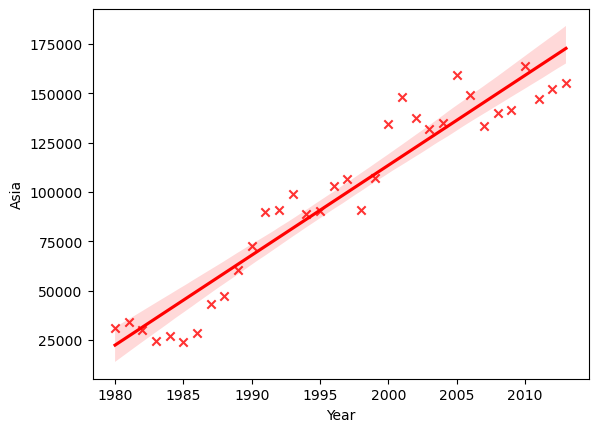

In [34]:
sns.regplot(x="Year", y="Asia", data=df_continent, color="red", marker="x")

In [ ]:
# kita break lagi 10 menit lalu masuk ke topik terakhir tentang Maps di 21.00